In [ ]:
## compare data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import sqlalchemy as db
import sys
from scipy.interpolate import interp1d
import os
from datetime import datetime, timedelta
from scipy.stats import norm
import math

In [3]:
# File paths for the CSV files
file_path_1 = 'Data/Straddles/straddle_returns_1.csv'
file_path_2 = 'Data/Straddles/straddle_returns_final.csv'
file_path_3 = 'Data/Straddles/straddle_returns_3.csv'
file_path_4 = 'Data/STRADDLE_RET.csv'

# Reading the CSV files into Pandas DataFrames
data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)
data_3 = pd.read_csv(file_path_3)
data_4 = pd.read_csv(file_path_4,skiprows=6)


In [23]:
def DATE_STR(num):
    num_str = str(num)
    date_str = num_str[-2:]+'/'+num_str[4:-2]+'/'+num_str[0:4]
    
    return date_str 

#data_2['Date'] = data_2['Date'].apply(DATE_STR)
data_4['Date'] = pd.to_datetime(data_4['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
data_4[data_4.columns[1:]] = data_4[data_4.columns[1:]]/100

#print('Date Range:')
#print('Start:',min(data_2.DATE).date())
#print('End:',max(data_2.DATE).date())
data_1 = data_1.rename(columns={'date': 'Date'})
data_2 = data_2.rename(columns={'date': 'Date'})
data_3 = data_3.rename(columns={'date': 'Date'})

#print(data_1)
#print(data_2)

In [24]:
# Merge datasets on 'Date' column
merged_data1 = pd.merge(data_1, data_4, on='Date', how='inner')
merged_data2 = pd.merge(data_2, data_4, on='Date', how='inner')
merged_data3 = pd.merge(data_3, data_4, on='Date', how='inner')

In [25]:
merged_data3

,Date,return_30,return_60,return_90,return_180,return_270,return_360,r_1^{straddle},r_2^{straddle},r_3^{straddle},r_6^{straddle},r_9^{straddle},r_12^{straddle},r_1^{short straddle},r_2^{short straddle},r_3^{short straddle},r_6^{short straddle},r_9^{short straddle},r_12^{short straddle}
0,1996-01-05,0.021429,0.041641,0.082105,0.070710,0.132633,0.194555,-0.04067,0.00827,0.01018,-0.00307,-0.00067,0.00855,0.00500,-0.00145,-0.00221,0.00101,0.00029,-0.00428
1,1996-01-08,-0.275858,-0.184628,-0.447740,-0.179965,-0.068715,-0.085525,-0.01795,-0.00642,-0.00443,0.00307,0.00234,0.00167,0.00224,0.00116,0.00098,-0.00101,-0.00101,-0.00085
2,1996-01-09,1.689315,0.869991,2.219155,0.311464,0.465440,1.128607,0.34233,0.09657,0.04109,-0.00396,-0.00324,0.04148,-0.04098,-0.01743,-0.00916,0.00132,0.00141,-0.02104
3,1996-01-10,0.431019,0.370507,0.986790,0.179564,0.288870,0.682246,0.00968,-0.02854,-0.01956,0.00723,-0.00770,-0.05758,-0.00139,0.00597,0.00482,-0.00246,0.00340,0.03095
4,1996-01-11,-0.465042,-0.250512,-0.665313,-0.116294,-0.096259,-0.148369,-0.09191,-0.06238,-0.03260,0.01116,-0.01824,-0.01151,0.01410,0.01363,0.00842,-0.00404,0.00835,0.00594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,2019-06-24,0.023361,0.011413,0.004542,0.010395,0.010891,0.006973,-0.05374,-0.04033,-0.03600,-0.02177,-0.01651,-0.01243,0.00788,0.00891,0.01000,0.00881,0.00830,0.00737
5904,2019-06-25,0.322807,0.211936,0.164088,0.110806,0.090534,0.090345,0.02155,0.00807,0.00500,0.00085,-0.00032,-0.00239,-0.00323,-0.00178,-0.00138,-0.00034,0.00016,0.00141
5905,2019-06-26,0.006191,0.005025,0.006602,0.007513,0.005607,0.002275,-0.03581,-0.02534,-0.01805,-0.00796,-0.00470,-0.00463,0.00578,0.00589,0.00519,0.00330,0.00241,0.00280
5906,2019-06-27,-0.148026,-0.098312,-0.078639,-0.053214,-0.054176,-0.045282,-0.01815,-0.01095,-0.00674,-0.00433,-0.00369,-0.00283,0.00292,0.00252,0.00193,0.00179,0.00190,0.00171


In [10]:
# Option1:
result_1 = merged_data1[['Date', 'return_30', 'r_1^{straddle}']]
result_2 = merged_data1[['Date', 'return_60', 'r_2^{straddle}']]
result_3 = merged_data1[['Date', 'return_90', 'r_3^{straddle}']]
result_6 = merged_data1[['Date', 'return_180', 'r_6^{straddle}']]
result_9 = merged_data1[['Date', 'return_270', 'r_9^{straddle}']]
result_12 = merged_data1[['Date', 'return_360', 'r_12^{straddle}']]
resultlist = [result_1, result_2, result_3, result_6, result_9, result_12]

0       0.00827
1      -0.00642
2       0.09657
3      -0.02854
4      -0.06238
         ...   
5903   -0.04033
5904    0.00807
5905   -0.02534
5906   -0.01095
5907   -0.00537
Name: r_2^{straddle}, Length: 5908, dtype: float64


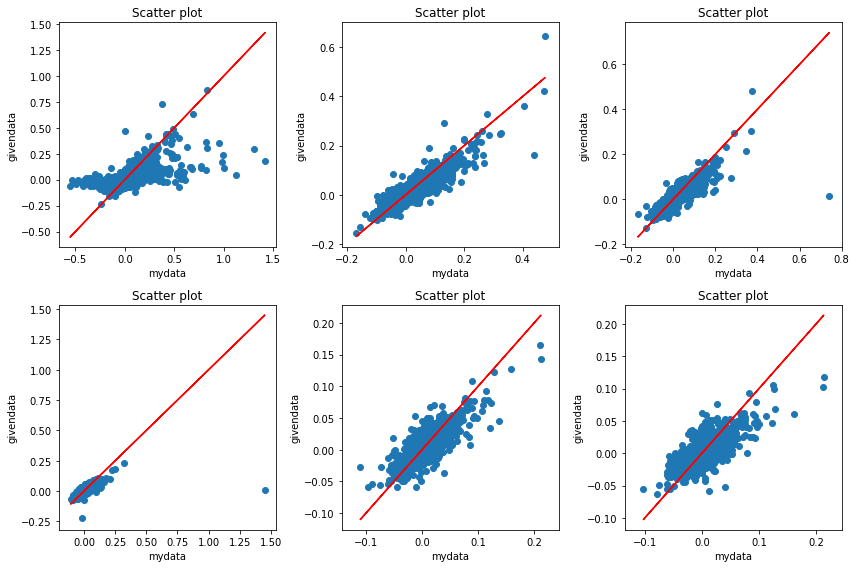

   Maturities  Correlations
0          30      0.699405
1          60      0.916906
2          90      0.860781
3         180      0.649732
4         270      0.826729
5         360      0.761063


In [13]:
# Assuming resultlist is a list of DataFrames
# Calculate the number of plots to create
num_plots = len(resultlist)

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of plots to display in a row
num_rows = - (-num_plots // num_cols)  # Rounds up the division to the nearest whole number

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))  # Adjust figsize as needed

# Flatten the axes if the number of subplots is less than num_rows x num_cols
axes = axes.flatten()

for i in range(num_plots):
    result = resultlist[i]
    ax = axes[i]
    ax.scatter(result.iloc[:, 1], result.iloc[:, 2])
    ax.plot(result.iloc[:, 1], result.iloc[:, 1], color='red')  # Line for correlation = 1
    ax.set_xlabel('mydata')
    ax.set_ylabel('givendata')
    ax.set_title('Scatter plot')

# Hide empty subplots if the number of plots doesn't fill all the subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation1 = result_1['return_30'].corr(result_1['r_1^{straddle}'])
correlation2 = result_2['return_60'].corr(result_2['r_2^{straddle}'])
correlation3 = result_3['return_90'].corr(result_3['r_3^{straddle}'])
correlation6 = result_6['return_180'].corr(result_6['r_6^{straddle}'])
correlation9 = result_9['return_270'].corr(result_9['r_9^{straddle}'])
correlation12 = result_12['return_360'].corr(result_12['r_12^{straddle}'])
data = {
    'Maturities': [30, 60, 90, 180, 270, 360],
    'Correlations': [correlation1, correlation2, correlation3, correlation6, correlation9,correlation12]
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)

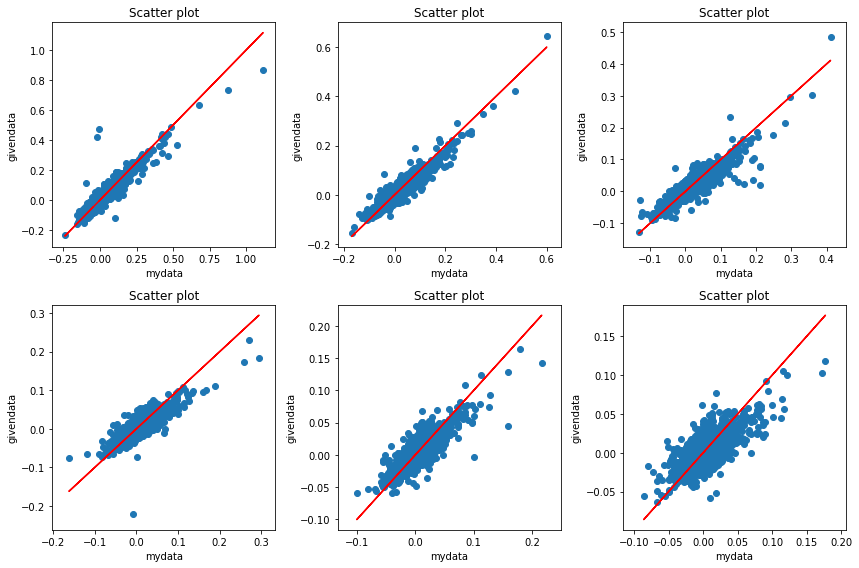

   Maturities  Correlations
0          30      0.958436
1          60      0.954783
2          90      0.922489
3         180      0.878423
4         270      0.852109
5         360      0.779068


In [14]:
# Option2: changing the weights
#Keep only 'Date' and the second column from both datasets
result_1 = merged_data2[['Date', 'return_30', 'r_1^{straddle}']]
result_2 = merged_data2[['Date', 'return_60', 'r_2^{straddle}']]
result_3 = merged_data2[['Date', 'return_90', 'r_3^{straddle}']]
result_6 = merged_data2[['Date', 'return_180', 'r_6^{straddle}']]
result_9 = merged_data2[['Date', 'return_270', 'r_9^{straddle}']]
result_12 = merged_data2[['Date', 'return_360', 'r_12^{straddle}']]
resultlist = [result_1, result_2, result_3, result_6, result_9, result_12]

# Assuming resultlist is a list of DataFrames
# Calculate the number of plots to create
num_plots = len(resultlist)

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of plots to display in a row
num_rows = - (-num_plots // num_cols)  # Rounds up the division to the nearest whole number

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))  # Adjust figsize as needed

# Flatten the axes if the number of subplots is less than num_rows x num_cols
axes = axes.flatten()

for i in range(num_plots):
    result = resultlist[i]
    ax = axes[i]
    ax.scatter(result.iloc[:, 1], result.iloc[:, 2])
    ax.plot(result.iloc[:, 1], result.iloc[:, 1], color='red')  # Line for correlation = 1
    ax.set_xlabel('mydata')
    ax.set_ylabel('givendata')
    ax.set_title('Scatter plot')

# Hide empty subplots if the number of plots doesn't fill all the subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation1 = result_1['return_30'].corr(result_1['r_1^{straddle}'])
correlation2 = result_2['return_60'].corr(result_2['r_2^{straddle}'])
correlation3 = result_3['return_90'].corr(result_3['r_3^{straddle}'])
correlation6 = result_6['return_180'].corr(result_6['r_6^{straddle}'])
correlation9 = result_9['return_270'].corr(result_9['r_9^{straddle}'])
correlation12 = result_12['return_360'].corr(result_12['r_12^{straddle}'])
data = {
    'Maturities': [30, 60, 90, 180, 270, 360],
    'Correlations': [correlation1, correlation2, correlation3, correlation6, correlation9,correlation12]
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)

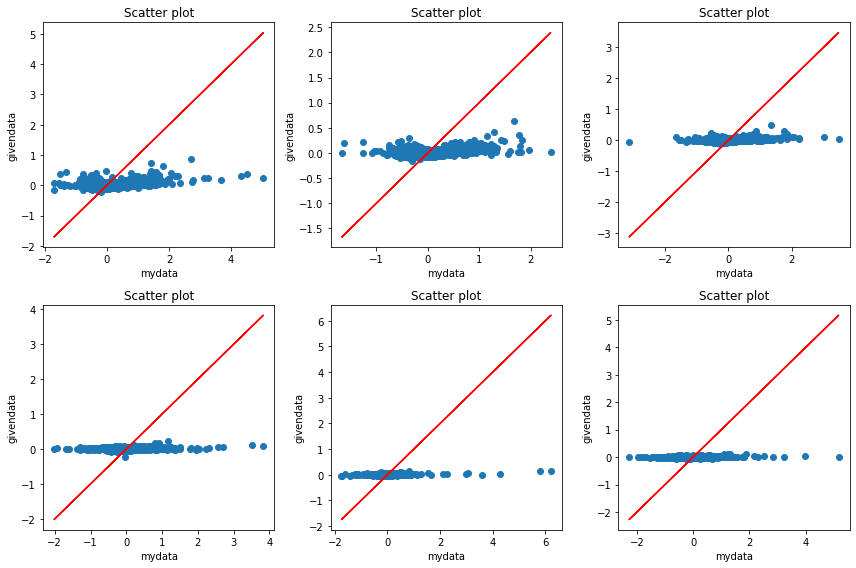

   Maturities  Correlations
0          30      0.344657
1          60      0.293942
2          90      0.265959
3         180      0.205868
4         270      0.224752
5         360      0.151520


In [26]:
# Option3: calculating the returns directly via the betas
#Keep only 'Date' and the second column from both datasets
result_1 = merged_data3[['Date', 'return_30', 'r_1^{straddle}']]
result_2 = merged_data3[['Date', 'return_60', 'r_2^{straddle}']]
result_3 = merged_data3[['Date', 'return_90', 'r_3^{straddle}']]
result_6 = merged_data3[['Date', 'return_180', 'r_6^{straddle}']]
result_9 = merged_data3[['Date', 'return_270', 'r_9^{straddle}']]
result_12 = merged_data3[['Date', 'return_360', 'r_12^{straddle}']]
resultlist = [result_1, result_2, result_3, result_6, result_9, result_12]

# Assuming resultlist is a list of DataFrames
# Calculate the number of plots to create
num_plots = len(resultlist)

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of plots to display in a row
num_rows = - (-num_plots // num_cols)  # Rounds up the division to the nearest whole number

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))  # Adjust figsize as needed

# Flatten the axes if the number of subplots is less than num_rows x num_cols
axes = axes.flatten()

for i in range(num_plots):
    result = resultlist[i]
    ax = axes[i]
    ax.scatter(result.iloc[:, 1], result.iloc[:, 2])
    ax.plot(result.iloc[:, 1], result.iloc[:, 1], color='red')  # Line for correlation = 1
    ax.set_xlabel('mydata')
    ax.set_ylabel('givendata')
    ax.set_title('Scatter plot')

# Hide empty subplots if the number of plots doesn't fill all the subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation1 = result_1['return_30'].corr(result_1['r_1^{straddle}'])
correlation2 = result_2['return_60'].corr(result_2['r_2^{straddle}'])
correlation3 = result_3['return_90'].corr(result_3['r_3^{straddle}'])
correlation6 = result_6['return_180'].corr(result_6['r_6^{straddle}'])
correlation9 = result_9['return_270'].corr(result_9['r_9^{straddle}'])
correlation12 = result_12['return_360'].corr(result_12['r_12^{straddle}'])
data = {
    'Maturities': [30, 60, 90, 180, 270, 360],
    'Correlations': [correlation1, correlation2, correlation3, correlation6, correlation9,correlation12]
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)